11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.8177 - loss: 0.6498 - val_accuracy: 0.9456 - val_loss: 0.1887
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9533 - loss: 0.1592 - val_accuracy: 0.9632 - val_loss: 0.1292
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9686 - loss: 0.1078 - val_accuracy: 0.9682 - val_loss: 0.1113
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9761 - loss: 0.0780 - val_accuracy: 0.9724 - val_loss: 0.0934
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9825 - loss: 0.0587 - val_accuracy: 0.9724 - val_loss: 0.0938
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9855 - loss: 0.0486 - val_accuracy: 0.9736 - val_loss: 0.0854
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9886 - loss: 0.0374 - val_accuracy: 0.9729 - val_loss: 0.0901
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9893 - loss: 0.0328 - val_accuracy:

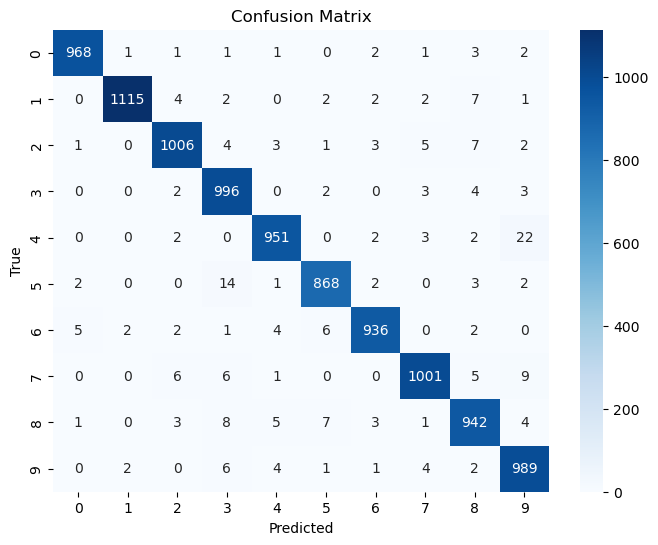

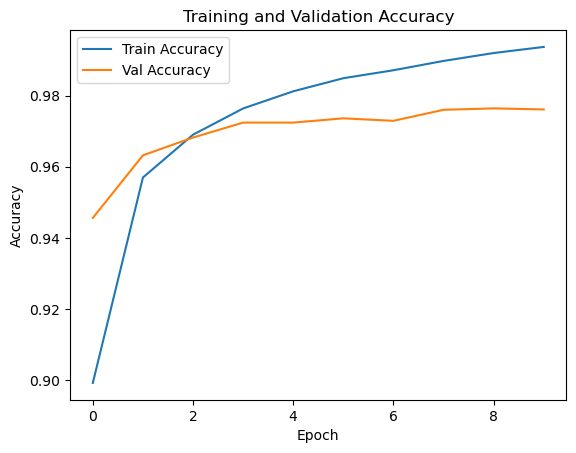

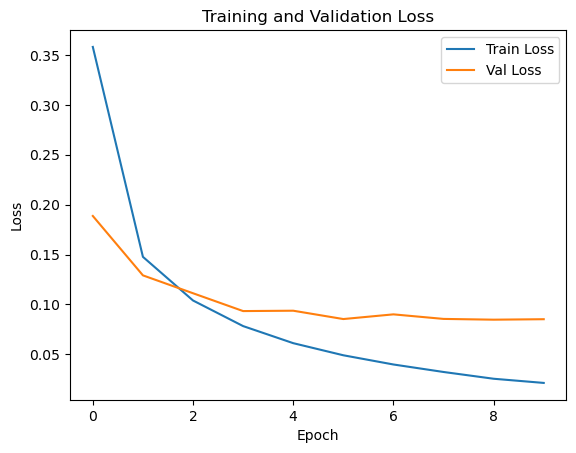

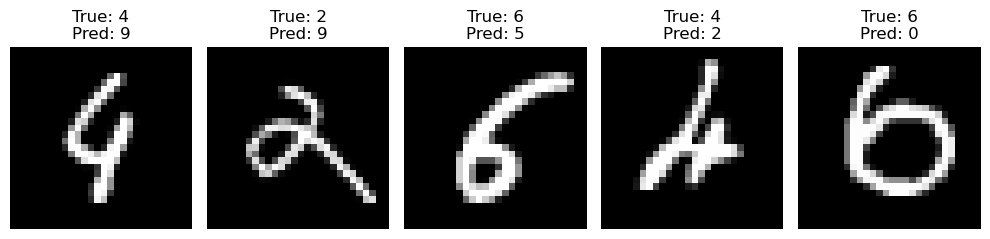

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Dataset Acquisition
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Data Preprocessing
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Splitting validation set from training
x_val = x_train[:10000]
y_val = y_train_cat[:10000]
x_train = x_train[10000:]
y_train_cat = y_train_cat[10000:]

# Model Architecture
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the Model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Training
history = model.fit(
    x_train, y_train_cat,
    epochs=10,
    batch_size=128,
    validation_data=(x_val, y_val)
)

# Evaluation
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print("\nTest Accuracy:", test_acc)

# Classification Report
y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Visualization of training
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Misclassified Examples
import numpy as np
wrong = np.where(y_pred_classes != y_test)[0]
plt.figure(figsize=(10, 5))
for i, idx in enumerate(wrong[:5]):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[idx]}\nPred: {y_pred_classes[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
